# Unused code

In [19]:
import pandas as pd
graph=pd.read_csv('graph.csv')

# Draw for loss

In [597]:
import re,math


size=[]
lossDic={}

totalLoss=[]
totalBatch=[]

with open("results.txt", "r") as f:
    data = f.readlines()

for i in range(0,len(data)):
    line = data[i].strip('\n')
    if line.startswith("Resizing"):
        size.append(data[i+1].strip('\n'))

size=list(set(size))     

for i in range(0,len(size)):
    lossDic[size[i]]={'loss':[],'batch':[]}


for i in range(0,len(data)):
    line = data[i].strip('\n')
    if line.startswith("Resizing"):
        batch=lossDic[data[i+1].strip('\n')]['batch']
        loss=lossDic[data[i+1].strip('\n')]['loss']
   
    res = re.match("\d*:", line)
    if res:
        totalBatch.append(int(line.split(":")[0]))
        totalLoss.append(math.log(float(line.split(":")[1].split(",")[1].strip().strip(' avg')),10))
        
        batch.append(int(line.split(":")[0]))
        loss.append(math.log(float(line.split(":")[1].split(",")[0].strip()),10))


print(size)

['608', '480', '576', '352', '544', '416', '512', '320', '384', '448']


ignore


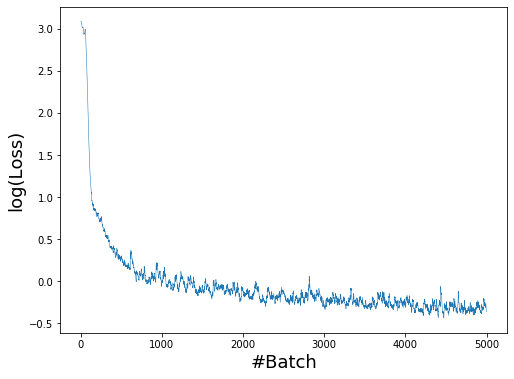

In [601]:
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(8, 6) 
for i in range(0,len(size)):
    if i==6:
        print("ignore")
    
        #plt.plot(lossDic[size[i]]['batch'],lossDic[size[i]]['loss'],lineWidth=0.5,label='Image size='+size[i]) 

plt.plot(totalBatch,totalLoss,lineWidth=0.5,label='Image')

plt.xlabel('#Batch', fontsize=18) 
plt.ylabel('log(Loss)', fontsize=18) 
#plt.legend(loc='upper right', fontsize=10, frameon=True, fancybox=True, framealpha=0.2, borderpad=0.3,
           #ncol=1, markerfirst=True, markerscale=1, numpoints=1, handlelength=3.5)
plt.savefig('./yoloTrain.jpg')
plt.show()

# Draw for Acc

In [560]:
import math


In [561]:
def recallCal(threshold):

    correctType1=0
    correctType2=0
    misClass1to2=0
    misClass2to1=0
    unRecognize1=0
    unRecognize2=0


    for i in range(0,len(groundTruth)):
        for j in range(0,len(groundTruth[i])):
            if groundTruth[i][j]['type']==1:
                if groundTruth[i][j]['confidence']>=threshold:
                    if groundTruth[i][j]['predict']==1:
                        correctType1=correctType1+1
                    elif groundTruth[i][j]['predict']==2:
                        misClass1to2=misClass1to2+1
                    else:
                        unRecognize1=unRecognize1+1
                else:
                    unRecognize1=unRecognize1+1

            if groundTruth[i][j]['type']==2:
                if groundTruth[i][j]['confidence']>=threshold:
                    if groundTruth[i][j]['predict']==2:
                        correctType2=correctType2+1
                    elif groundTruth[i][j]['predict']==1:
                        misClass2to1=misClass2to1+1
                    else:
                        unRecognize2=unRecognize2+1
                else:
                    unRecognize2=unRecognize2+1

    recall={'correctType1':correctType1,'correctType2':correctType2,'misClass1to2':misClass1to2,'misClass2to1':misClass2to1,'unRecognize1':unRecognize1,'unRecognize2':unRecognize2}

    #print('correctType1:',correctType1)
    #print('correctType2:',correctType2)
    #print('misClass1to2:',misClass1to2)
    #print('misClass2to1:',misClass2to1)
    #print('unRecognize1:',unRecognize1)
    #print('unRecognize2:',unRecognize2)
    
    return recall

def precisionCal(threshold):


    correctType1=0
    correctType2=0
    misClass1to2=0
    misClass2to1=0
    wrongAdd1=0
    wrongAdd2=0

    for i in range(0,len(predict)):
        for j in range(0,len(predict[i])):
            if predict[i][j]['type']==1:
                if predict[i][j]['confidence']>=threshold:
                    if predict[i][j]['groundTruth']==1:
                        correctType1=correctType1+1
                    elif predict[i][j]['groundTruth']==2:
                        misClass2to1=misClass1to2+1
                    else:
                        wrongAdd1=wrongAdd1+1


            if predict[i][j]['type']==2:
                if predict[i][j]['confidence']>=threshold:
                    if predict[i][j]['groundTruth']==2:
                        correctType2=correctType2+1
                    elif predict[i][j]['groundTruth']==1:
                        misClass1to2=misClass2to1+1
                    else:
                        wrongAdd2=wrongAdd2+1

    precision={'correctType1':correctType1,'correctType2':correctType2,'misClass1to2':misClass1to2,'misClass2to1':misClass2to1,'wrongAdd1':wrongAdd1,'wrongAdd2':wrongAdd2}

    #print('correctType1:',correctType1)
    #print('correctType2:',correctType2)
    #print('misClass1to2:',misClass1to2)
    #print('misClass2to1:',misClass2to1)
    #print('wrongAdd1:',wrongAdd1)
    #print('wrongAdd2:',wrongAdd2)
    
    return precision


def checkSameObject(groundTruthObj,predictedObj,checkLimit):
    return (abs(groundTruthObj['position'][0]-predictedObj['position'][0])<=checkLimit and abs(groundTruthObj['position'][1]-predictedObj['position'][1])<=checkLimit)

In [562]:
def recallAllCal(threshold):

    recognized1=0
    recognized2=0
    correctType1=0
    correctType2=0
    misClass1to2=0
    misClass2to1=0
    unRecognize1=0
    unRecognize2=0


    for i in range(0,len(groundTruth)):
        for j in range(0,len(groundTruth[i])):
            if groundTruth[i][j]['type']==1:
                if groundTruth[i][j]['predict']!=0:
                    recognized1=recognized1+1
                    if groundTruth[i][j]['confidence']>=threshold and groundTruth[i][j]['predict']==1:
                        correctType1=correctType1+1
                    else:
                        misClass1to2=misClass1to2+1       
                else:
                    unRecognize1=unRecognize1+1

            if groundTruth[i][j]['type']==2:
                if groundTruth[i][j]['predict']!=0:
                    recognized2=recognized2+1
 
                    if groundTruth[i][j]['confidence']>=threshold and groundTruth[i][j]['predict']==2:

                        correctType2=correctType2+1
                    else:
                        misClass2to1=misClass2to1+1
                else:
                    unRecognize2=unRecognize2+1

    recall={'recognized1':recognized1,'recognized2':recognized2,'correctType1':correctType1,'correctType2':correctType2,'misClass1to2':misClass1to2,'misClass2to1':misClass2to1,'unRecognize1':unRecognize1,'unRecognize2':unRecognize2}

    #print('correctType1:',correctType1)
    #print('correctType2:',correctType2)
    #print('misClass1to2:',misClass1to2)
    #print('misClass2to1:',misClass2to1)
    #print('unRecognize1:',unRecognize1)
    #print('unRecognize2:',unRecognize2)
    
    return recall

In [563]:
def recallAllTogeCal(threshold):

    recognized=0
    unRecognize=0

    correctType1=0
    correctType2=0
    misClass1to2=0
    misClass2to1=0




    for i in range(0,len(groundTruth)):
        for j in range(0,len(groundTruth[i])):
            if groundTruth[i][j]['predict']!=0:
                recognized=recognized+1
                
                if groundTruth[i][j]['type']==1:
                    if groundTruth[i][j]['confidence']>=threshold and groundTruth[i][j]['predict']==1:
                        correctType1=correctType1+1
                    else:
                        misClass1to2=misClass1to2+1
                if groundTruth[i][j]['type']==2:
                    if groundTruth[i][j]['predict']==2:
                        correctType2=correctType2+1
                    else:
                        misClass2to1=misClass2to1+1
                    
                    
            else:
                unRecognize=unRecognize+1
                

    recall={'recognized':recognized,'correctType1':correctType1,'correctType2':correctType2,'misClass1to2':misClass1to2,'misClass2to1':misClass2to1,'unRecognize':unRecognize}

    #print('correctType1:',correctType1)
    #print('correctType2:',correctType2)
    #print('misClass1to2:',misClass1to2)
    #print('misClass2to1:',misClass2to1)
    #print('unRecognize1:',unRecognize1)
    #print('unRecognize2:',unRecognize2)
    
    return recall

In [567]:
import os,json
from PIL import Image

trainDir="FaceMaskDataset/train/Images/"
valDir="FaceMaskDataset/val/Images/"

curDir=valDir
checkLimit=0.05

groundTruth=[]
predict=[]

files = os.listdir(curDir)
for fileName in files:
    fileNameM,ext=os.path.splitext(fileName)
    if ext==".txt":
        #print(fileNameM)
        
        im = Image.open(curDir+fileNameM+".jpg")
        width=im.size[0]
        height=im.size[1]
        
        
        with open(curDir+fileName, "r") as f:
            data = f.readlines()
        
        singleTruth=[]
        for i in range(0,len(data)):
            position=[]
            line = data[i].strip('\n')
            elements=line.split(" ")
            #print(elements)
            if elements[0]==' ' or elements[0]=='' or isinstance(elements[0],int):
                classType=0
                position=[]   
            else:
                classType=int(elements[0])

                if classType !=1 and classType !=2:
                    classType=0
                    position=[]
                else:
                    if len(elements)>=5:

                        position=[float(elements[1]),float(elements[2]),float(elements[3]),float(elements[4])]
                    else:
                        position=[]
           
            objTruth={'type':classType,'position':position}
            
            singleTruth.append(objTruth)
        
        #print(singleTruth)
        groundTruth.append(singleTruth)
        
        
        with open(curDir+fileNameM+".json",'r') as jsonFile:
            load_dict = json.load(jsonFile)
        
        singlePre=[]
        if len(load_dict)==0:
            singlePre=[{'type':0, 'confidence':1,'position':[]}]
        else:
            for i in range(0,len(load_dict)):
               
                if load_dict[i][0]=='face_mask':
                    preObjResult={'type':1, 'confidence':load_dict[i][1],'position':[load_dict[i][2][0]/width,load_dict[i][2][1]/height,load_dict[i][2][2]/width,load_dict[i][2][3]/height]}
                elif load_dict[i][0]=='face':
                    preObjResult={'type':2, 'confidence':load_dict[i][1],'position':[load_dict[i][2][0]/width,load_dict[i][2][1]/height,load_dict[i][2][2]/width,load_dict[i][2][3]/height]}
                else:
                    preObjResult={'type':0, 'confidence':load_dict[i][1],'position':[load_dict[i][2][0]/width,load_dict[i][2][1]/height,load_dict[i][2][2]/width,load_dict[i][2][3]/height]}
                    

                singlePre.append(preObjResult)
        
        
        #print(singlePre)
        predict.append(singlePre)
        
        findImg=[]
        for i in range(0,len(singlePre)):
            findImg.append(singlePre[i]['type'])
            if singlePre[i]['confidence']<0.5:
                nonSense=1
                #print(singlePre[i])
        if len(set(findImg))>1:
            #print(fileNameM)
            #print(findImg)
            nonSense=1
       
        
for i in range(0,len(groundTruth)):
    for j in range(0,len(groundTruth[i])):
        if predict[i][0]['type']==0:
            groundTruth[i][j]['predict']=0
            groundTruth[i][j]['confidence']=1
        else:
            flag=1
            for k in range(0,len(predict[i])):
                if checkSameObject(groundTruth[i][j],predict[i][k],checkLimit):
                    flag=0
                    groundTruth[i][j]['predict']=predict[i][k]['type']
                    groundTruth[i][j]['confidence']=predict[i][k]['confidence']
                    predict[i][k]['groundTruth']=groundTruth[i][j]['type']
                    break
            if flag:
                groundTruth[i][j]['predict']=0
                groundTruth[i][j]['confidence']=1


    for p in range(0,len(predict[i])):
        if not 'groundTruth' in predict[i][p].keys():
            #print(p)
            #print(groundTruth[i])
            #print(predict[i])
            predict[i][p]['groundTruth']=0
            

In [568]:
i=1
print(predict[i])
print(groundTruth[i])

[{'type': 2, 'confidence': 0.9947526454925537, 'position': [0.6893884539604187, 0.33573398399080157, 0.23601393401622772, 0.44143340584205115], 'groundTruth': 2}]
[{'type': 2, 'position': [0.6845703125, 0.35765379113018597, 0.216796875, 0.44635193133047213], 'predict': 2, 'confidence': 0.9947526454925537}]


In [569]:
threshold=0.9


In [570]:
threshold=0.9
results=precisionCal(threshold)
temp=recallCal(threshold)
results['unRecognize1']=temp['unRecognize1']
results['unRecognize2']=temp['unRecognize2']

class1Results={}
class2Results={}
bothResult={}

class1Results['precision']=results['correctType1']/(results['correctType1']+results['misClass2to1']+results['wrongAdd1'])
class1Results['recall']=results['correctType1']/(results['correctType1']+results['misClass1to2']+results['unRecognize1'])
class1Results['precision_recog']=results['correctType1']/(results['correctType1']+results['misClass2to1'])
class1Results['recall_recog']=results['correctType1']/(results['correctType1']+results['misClass1to2'])
class1Results['recogRate']=(results['correctType1']+results['misClass1to2'])/(results['correctType1']+results['misClass1to2']+results['unRecognize1'])


class2Results['precision']=results['correctType2']/(results['correctType2']+results['misClass1to2']+results['wrongAdd2'])
class2Results['recall']=results['correctType2']/(results['correctType2']+results['misClass2to1']+results['unRecognize2'])
class2Results['precision_recog']=results['correctType2']/(results['correctType2']+results['misClass1to2'])
class2Results['recall_recog']=results['correctType2']/(results['correctType2']+results['misClass2to1'])
class2Results['recogRate']=(results['correctType2']+results['misClass2to1'])/(results['correctType2']+results['misClass2to1']+results['unRecognize2'])



bothResult['TPR']=(results['correctType1'])/(results['correctType1']+results['misClass1to2'])
bothResult['FPR']=(results['misClass2to1'])/(results['correctType2']+results['misClass2to1'])
bothResult['accuracy_recog']=(results['correctType1']+results['correctType2'])/(results['correctType1']+results['misClass1to2']+results['correctType2']+results['misClass2to1'])
bothResult['accuracy']=(results['correctType1']+results['correctType2'])/(results['correctType1']+results['misClass1to2']+results['unRecognize1']+results['correctType2']+results['misClass2to1']+results['unRecognize2'])
bothResult['recogRate']=(results['correctType1']+results['misClass1to2']+results['correctType2']+results['misClass2to1'])/(results['correctType1']+results['misClass1to2']+results['unRecognize1']+results['correctType2']+results['misClass2to1']+results['unRecognize2'])
class2Results['precision']=(results['correctType2']+results['correctType1'])/(results['correctType2']+results['misClass1to2']+results['wrongAdd2']+results['correctType1']+results['misClass2to1']+results['wrongAdd1'])
class2Results['recall']=(results['correctType2']+results['correctType1'])/(results['correctType2']+results['misClass2to1']+results['unRecognize2']+results['correctType1']+results['misClass1to2']+results['unRecognize1'])

print(class1Results)
print(class2Results)
print(bothResult)



pipeLineResult=recallAllCal(threshold)
pipeLineResult['TPR']=pipeLineResult['correctType1']/pipeLineResult['recognized1']
pipeLineResult['FPR']=pipeLineResult['misClass2to1']/pipeLineResult['recognized2']
pipeLineResult['accuracy']=(pipeLineResult['correctType1']+pipeLineResult['correctType2'])/(pipeLineResult['recognized1']+pipeLineResult['recognized2'])
pipeLineResult['precision']=pipeLineResult['correctType1']/(pipeLineResult['recognized1']+pipeLineResult['misClass2to1'])
pipeLineResult['recall']=pipeLineResult['correctType1']/pipeLineResult['recognized1']
pipeLineResult['recogRate']=(pipeLineResult['recognized1']+pipeLineResult['recognized2'])/(pipeLineResult['recognized1']+pipeLineResult['recognized2']+pipeLineResult['unRecognize1']+pipeLineResult['unRecognize2'])

print(pipeLineResult)


{'precision': 0.9282178217821783, 'recall': 0.7232401157184185, 'precision_recog': 0.9778357235984355, 'recall_recog': 0.97911227154047, 'recogRate': 0.7386692381870781}
{'precision': 0.9486377847253238, 'recall': 0.729145211122554, 'precision_recog': 0.9884892086330935, 'recall_recog': 0.9877785765636233, 'recogRate': 0.7414712153518124}
{'TPR': 0.97911227154047, 'FPR': 0.012221423436376708, 'accuracy_recog': 0.9847009735744089, 'accuracy': 0.729145211122554, 'recogRate': 0.7404737384140062}
{'recognized1': 967, 'recognized2': 1830, 'correctType1': 750, 'correctType2': 1396, 'misClass1to2': 217, 'misClass2to1': 434, 'unRecognize1': 74, 'unRecognize2': 68, 'TPR': 0.7755946225439504, 'FPR': 0.2371584699453552, 'accuracy': 0.7672506256703611, 'precision': 0.5353319057815846, 'recall': 0.7755946225439504, 'recogRate': 0.9516842463422933}


In [618]:
th=0.55
print(calRate(th)[2])

{'wrong2': 0.09856153436334576, 'TPR': 0.961038961038961, 'FPR': 0.021399652978600348, 'accuracy_recog': 0.9724839803995476, 'accuracy': 0.8865979381443299, 'recogRate': 0.9116838487972508, 'precision': 0.9188034188034188, 'recall': 0.8865979381443299}


In [571]:
def calRate(threshold):

    results=precisionCal(threshold)
    temp=recallCal(threshold)
    results['unRecognize1']=temp['unRecognize1']
    results['unRecognize2']=temp['unRecognize2']

    class1Results={}
    class2Results={}
    bothResult={}

    class1Results['precision']=results['correctType1']/(results['correctType1']+results['misClass2to1']+results['wrongAdd1'])
    class1Results['recall']=results['correctType1']/(results['correctType1']+results['misClass1to2']+results['unRecognize1'])
    class1Results['precision_recog']=results['correctType1']/(results['correctType1']+results['misClass2to1'])
    class1Results['recall_recog']=results['correctType1']/(results['correctType1']+results['misClass1to2'])
    class1Results['recogRate']=(results['correctType1']+results['misClass1to2'])/(results['correctType1']+results['misClass1to2']+results['unRecognize1'])


    class2Results['precision']=results['correctType2']/(results['correctType2']+results['misClass1to2']+results['wrongAdd2'])
    class2Results['recall']=results['correctType2']/(results['correctType2']+results['misClass2to1']+results['unRecognize2'])
    class2Results['precision_recog']=results['correctType2']/(results['correctType2']+results['misClass1to2'])
    class2Results['recall_recog']=results['correctType2']/(results['correctType2']+results['misClass2to1'])
    class2Results['recogRate']=(results['correctType2']+results['misClass2to1'])/(results['correctType2']+results['misClass2to1']+results['unRecognize2'])


    bothResult['wrong2']=(results['misClass2to1']+results['unRecognize2'])/(results['correctType2']+results['misClass2to1']+results['unRecognize2'])
    bothResult['TPR']=(results['correctType1'])/(results['correctType1']+results['misClass1to2'])
    bothResult['FPR']=(results['misClass2to1'])/(results['correctType2']+results['misClass2to1'])
    bothResult['accuracy_recog']=(results['correctType1']+results['correctType2'])/(results['correctType1']+results['misClass1to2']+results['correctType2']+results['misClass2to1'])
    bothResult['accuracy']=(results['correctType1']+results['correctType2'])/(results['correctType1']+results['misClass1to2']+results['unRecognize1']+results['correctType2']+results['misClass2to1']+results['unRecognize2'])
    bothResult['recogRate']=(results['correctType1']+results['misClass1to2']+results['correctType2']+results['misClass2to1'])/(results['correctType1']+results['misClass1to2']+results['unRecognize1']+results['correctType2']+results['misClass2to1']+results['unRecognize2'])
    bothResult['precision']=(results['correctType2']+results['correctType1'])/(results['correctType2']+results['misClass1to2']+results['wrongAdd2']+results['correctType1']+results['misClass2to1']+results['wrongAdd1'])
    bothResult['recall']=(results['correctType2']+results['correctType1'])/(results['correctType2']+results['misClass2to1']+results['unRecognize2']+results['correctType1']+results['misClass1to2']+results['unRecognize1'])

    pipeLineResult=recallAllCal(threshold)
    pipeLineResult['TPR']=pipeLineResult['correctType1']/pipeLineResult['recognized1']
    pipeLineResult['FPR']=pipeLineResult['misClass2to1']/pipeLineResult['recognized2']
    pipeLineResult['accuracy']=(pipeLineResult['correctType1']+pipeLineResult['correctType2'])/(pipeLineResult['recognized1']+pipeLineResult['recognized2'])
    pipeLineResult['precision']=pipeLineResult['correctType1']/(pipeLineResult['correctType1']+pipeLineResult['misClass2to1'])
    pipeLineResult['recall']=pipeLineResult['correctType1']/pipeLineResult['recognized1']
    pipeLineResult['recogRate']=(pipeLineResult['recognized1']+pipeLineResult['recognized2'])/(pipeLineResult['recognized1']+pipeLineResult['recognized2']+pipeLineResult['unRecognize1']+pipeLineResult['unRecognize2'])

    togeResult=recallAllTogeCal(threshold)
    togeResult['TPR']=togeResult['correctType1']/togeResult['correctType1']+togeResult['misClass1to2']
    togeResult['FPR']=togeResult['misClass2to1']/togeResult['correctType2']+togeResult['misClass2to1']
    togeResult['accuracy']=(togeResult['correctType1']+togeResult['correctType2'])/(togeResult['recognized'])
    togeResult['precision']=togeResult['correctType1']/(togeResult['correctType1']+togeResult['misClass2to1'])
    togeResult['recall']=togeResult['correctType1']/(togeResult['correctType1']+togeResult['misClass1to2'])
    togeResult['recogRate']=(togeResult['recognized'])/(togeResult['recognized']+togeResult['unRecognize'])


    
    return [class1Results,class2Results,bothResult,pipeLineResult,togeResult]



In [606]:
precision=[]
recall=[]
thre=[]
recogRate=[]
wrong2=[]
precision1=[]
recall1=[]
precision2=[]
recall2=[]
recogRate1=[]
recogRate2=[]
for i in range(0,100):
    threshold=i/100
    result=calRate(threshold)
    
    precision.append(result[0]['precision'])
    recall.append(result[0]['recall'])
    thre.append(threshold)
    wrong2.append(result[2]['wrong2'])
    
    
    precision1.append(result[0]['precision'])
    recall1.append(result[0]['recall'])
    
    precision2.append(result[1]['precision'])
    recall2.append(result[1]['recall'])
    
    recogRate1.append(result[0]['recogRate'])
    recogRate2.append(result[1]['recogRate'])
    recogRate.append(result[2]['recogRate'])
    
    
    #print(result[4])

<Figure size 576x432 with 0 Axes>

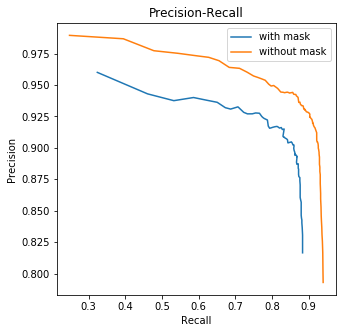

In [616]:
import matplotlib.pyplot as plt
plt.figure()

plt.figure(figsize=(5,5))
#plt.plot(thre, wrong2, color='darkorange',label='Unrecognized without mask') 
#plt.plot(thre, precision1, color='green',label='Correctly recognized with mask') 
plt.plot(recall1, precision1, label='with mask') #color='blue',
plt.plot(recall2, precision2, label='without mask') #color='orange',
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.legend()
plt.show()



<Figure size 576x432 with 0 Axes>

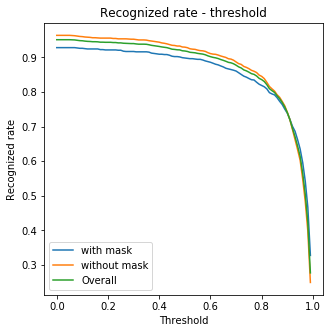

In [615]:
import matplotlib.pyplot as plt
plt.figure()

plt.figure(figsize=(5,5))
#plt.plot(thre, wrong2, color='darkorange',label='Unrecognized without mask') 
#plt.plot(thre, precision1, color='green',label='Correctly recognized with mask') 
plt.plot(thre, recogRate1,label='with mask') # color='blue',
plt.plot(thre, recogRate2, label='without mask') #color='orange',
plt.plot(thre, recogRate, label='Overall') #color='red',
plt.xlabel('Threshold')
plt.ylabel('Recognized rate')
plt.title('Recognized rate - threshold')
plt.legend()
plt.show()




No handles with labels found to put in legend.


<Figure size 576x432 with 0 Axes>

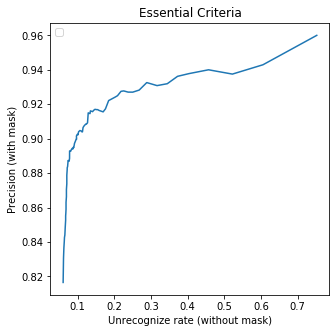

In [614]:
import matplotlib.pyplot as plt
plt.figure()

plt.figure(figsize=(5,5))
#plt.plot(thre, wrong2, color='darkorange',label='Unrecognized without mask') 
#plt.plot(thre, precision1, color='green',label='Correctly recognized with mask') 
plt.plot(wrong2, precision1) 
plt.xlabel('Unrecognize rate (without mask)')
plt.ylabel('Precision (with mask)')
plt.title('Essential Criteria')
plt.legend()
plt.show()


In [589]:
print(calRate(0.5)[0]['precision'])
print(calRate(0.5)[2]['wrong2'])

0.8971774193548387
0.09105431309904154


In [590]:
print(calRate(0.6)[0]['precision'])
print(calRate(0.6)[2]['wrong2'])

0.9045174537987679
0.10862619808306709
